In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Feature Scaling**

In [5]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [6]:
X = df.drop(columns=['Purchased','Gender','User ID'])
Y = df['Purchased']

In [7]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


**Splitting the dataset into the Training set and Test set**

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Fitting Random Forest to the Training set**

In [10]:
randomforest=RandomForestClassifier(max_depth=88,n_estimators=5,random_state=10)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=88, n_estimators=5, random_state=10)

**Predicting the Test set results**

In [11]:
y_pred=randomforest.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

**Making the Confusion Matrix**

In [12]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,45,7,52
1,2,26,28
All,47,33,80


**Visualising the Training set results**

In [13]:
training_score = randomforest.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 96.5625


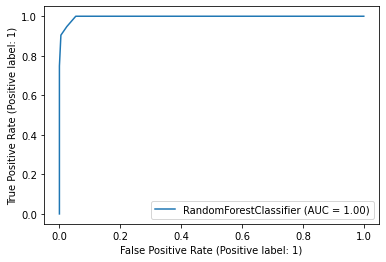

In [14]:
RocCurveDisplay.from_estimator(randomforest,x_train,y_train)

**Visualising the Test set results**

In [15]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 88.75


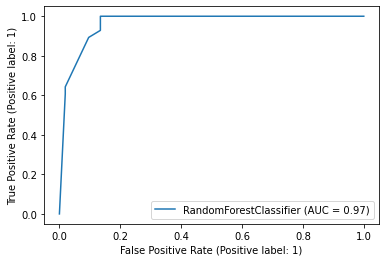

In [16]:
RocCurveDisplay.from_estimator(randomforest,x_test,y_test)